In [84]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
from sklearn.metrics import mean_squared_error

from sklearn.feature_selection import SequentialFeatureSelector, RFE
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display="diagram")

from sklearn.metrics import mean_squared_error
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.inspection import permutation_importance

Data Preparation:

Check the data content for the Car dataset and research each of the columns with respect to the target price.

In [85]:
myPathm = '/home/jupyterlab_user/notebooks/data/vehicles.csv'
vehicles_q = pd.read_csv(myPathm)
vehicles_q.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [86]:
vehicles_q = vehicles_q.dropna()

In [87]:
vehicles_q.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
126,7305672709,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,68472.0,clean,automatic,1GCWGAFP8J1309579,rwd,full-size,van,white,al
127,7305672266,auburn,0,2019.0,chevrolet,express cargo van,like new,6 cylinders,gas,69125.0,clean,automatic,1GCWGAFP4K1214373,rwd,full-size,van,white,al
128,7305672252,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,66555.0,clean,automatic,1GCWGAFPXJ1337903,rwd,full-size,van,white,al
215,7316482063,birmingham,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,JTDBT123520243495,fwd,compact,sedan,blue,al
219,7316429417,birmingham,2500,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,WBAHD6322SGK86772,rwd,mid-size,sedan,white,al


In [88]:
vehicles_q.describe()

,id,price,year,odometer
count,3.486800e+04,34868.000000,34868.000000,3.486800e+04
mean,7.311508e+09,15837.446771,2011.176867,1.073991e+05
std,4.299751e+06,13460.056823,7.162332,9.990878e+04
min,7.301592e+09,0.000000,1905.000000,0.000000e+00
25%,7.308189e+09,6500.000000,2008.000000,6.516400e+04
50%,7.312225e+09,12000.000000,2013.000000,1.040000e+05
75%,7.315136e+09,22003.500000,2016.000000,1.411678e+05
max,7.317099e+09,155000.000000,2022.000000,9.999999e+06


In [90]:
vehicles_q.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34868 entries, 126 to 426836
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            34868 non-null  int64  
 1   region        34868 non-null  object 
 2   price         34868 non-null  int64  
 3   year          34868 non-null  float64
 4   manufacturer  34868 non-null  object 
 5   model         34868 non-null  object 
 6   condition     34868 non-null  object 
 7   cylinders     34868 non-null  object 
 8   fuel          34868 non-null  object 
 9   odometer      34868 non-null  float64
 10  title_status  34868 non-null  object 
 11  transmission  34868 non-null  object 
 12  VIN           34868 non-null  object 
 13  drive         34868 non-null  object 
 14  size          34868 non-null  object 
 15  type          34868 non-null  object 
 16  paint_color   34868 non-null  object 
 17  state         34868 non-null  object 
dtypes: float64(2), int64(2), obj

[Text(0.5, 1.0, 'Price Distribution observed for default dataset')]

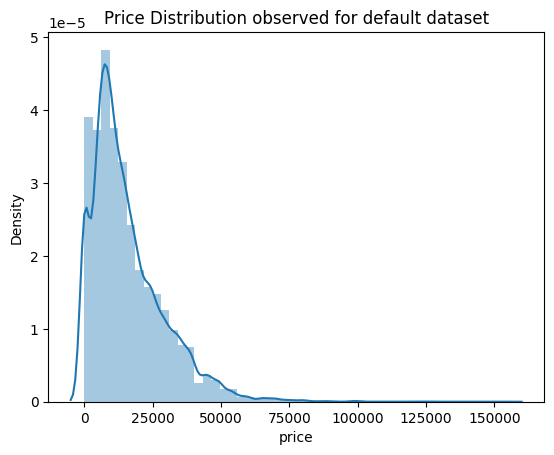

In [7]:
sns.distplot(
    vehicles_q['price']
).set(title = "Price Distribution observed for default dataset")

Inference from the above data: Given data set is spread between 0 > price > 150000. The data could potentially be filtered for dataset with price < 55000

In [9]:
vehicle_sort=vehicles_q[vehicles_q['price'] >= 55000]
print(vehicle_sort.info())

<class 'pandas.core.frame.DataFrame'>
Index: 439 entries, 346 to 426778
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            439 non-null    int64  
 1   region        439 non-null    object 
 2   price         439 non-null    int64  
 3   year          439 non-null    float64
 4   manufacturer  439 non-null    object 
 5   model         439 non-null    object 
 6   condition     439 non-null    object 
 7   cylinders     439 non-null    object 
 8   fuel          439 non-null    object 
 9   odometer      439 non-null    float64
 10  title_status  439 non-null    object 
 11  transmission  439 non-null    object 
 12  VIN           439 non-null    object 
 13  drive         439 non-null    object 
 14  size          439 non-null    object 
 15  type          439 non-null    object 
 16  paint_color   439 non-null    object 
 17  state         439 non-null    object 
dtypes: float64(2), int64(2), objec

Observation confirms there is less points in the dataset above 55000 so the dataset can be filtered further.

In [10]:
vehicle_sort.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
346,7315259946,birmingham,98900,2001.0,ferrari,360 modena,good,8 cylinders,gas,20187.0,clean,automatic,ZFFYT53A110125703,rwd,mid-size,convertible,red,al
365,7314956487,birmingham,72900,2021.0,chevrolet,tahoe,good,8 cylinders,gas,19129.0,clean,automatic,1GNSKPKD7MR102321,4wd,full-size,SUV,grey,al
857,7311380183,birmingham,59990,2017.0,ford,super duty f-550 drw,good,8 cylinders,diesel,31337.0,clean,automatic,1FD0X5HTXHEB33429,4wd,full-size,truck,white,al
4803,7302197505,montgomery,58995,2018.0,chevrolet,camaro,excellent,8 cylinders,gas,10626.0,clean,automatic,1G1FK1R62J0162496,rwd,sub-compact,coupe,silver,al
4826,7316436488,tuscaloosa,104900,2020.0,bmw,m805i,excellent,8 cylinders,gas,9000.0,clean,automatic,WBAGV8C04LBP48895,4wd,full-size,sedan,black,al


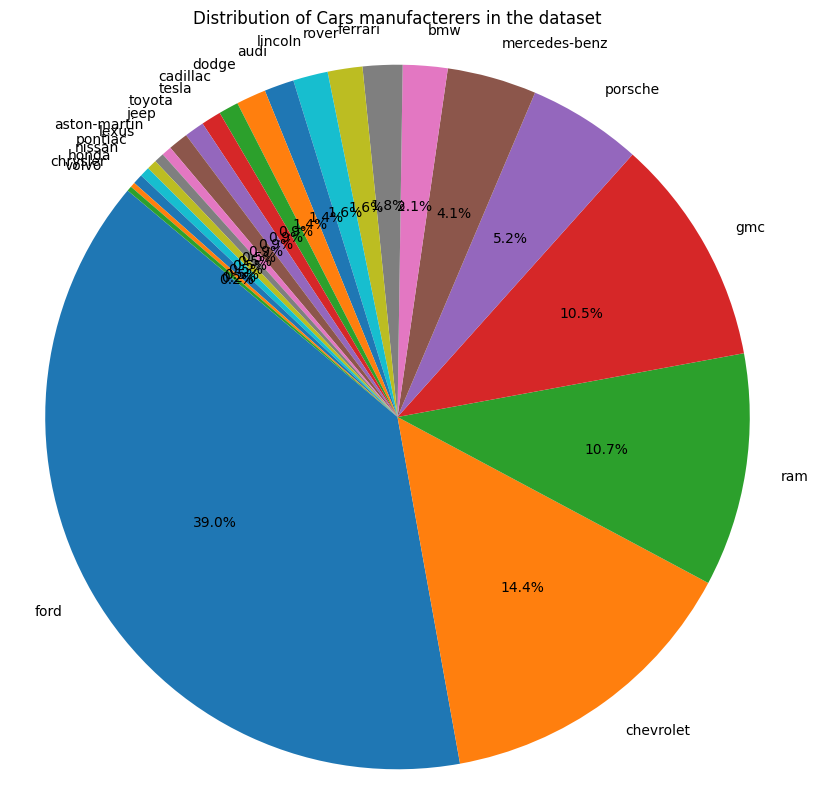

In [93]:
v_manufacturer_count = vehicle_sort['manufacturer'].value_counts()

# Plotting
plt.figure(figsize=(10, 10))
plt.pie(v_manufacturer_count, labels=v_manufacturer_count.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Cars manufacterers in the dataset')
plt.show()

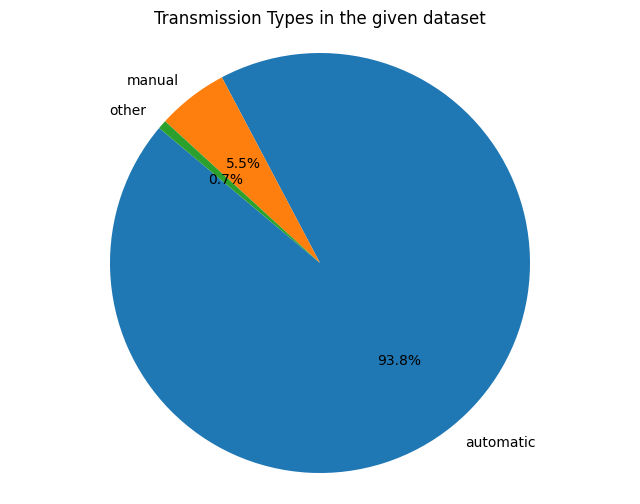

In [94]:
transmission_counts = vehicle_sort['transmission'].value_counts()

# Plotting the transmission types as a pie chart
plt.figure(figsize=(8, 6))
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Transmission Types in the given dataset')
plt.axis('equal')
plt.show()

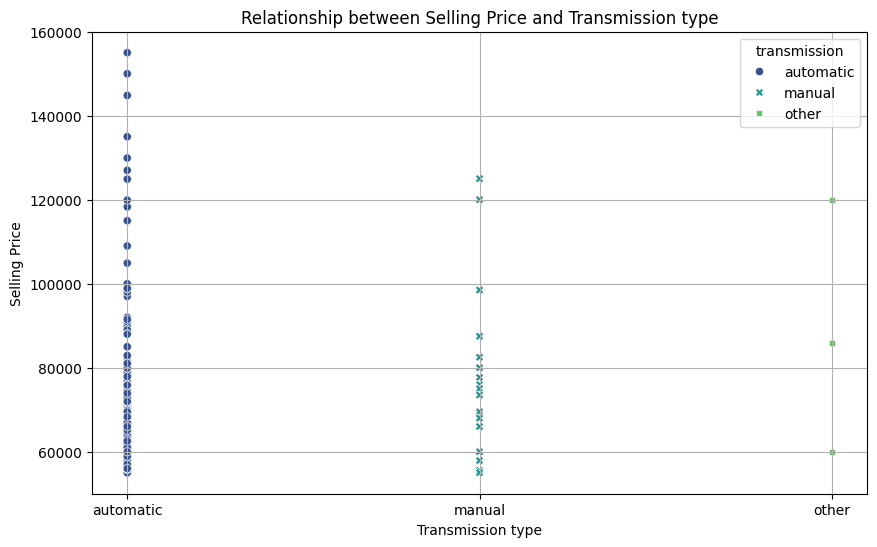

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="transmission", y="price", data=vehicle_sort, hue="transmission", style="transmission", palette="viridis")
plt.title("Relationship between Selling Price and Transmission type")
plt.xlabel("Transmission type")
plt.ylabel("Selling Price")
plt.legend(title="transmission")
plt.grid(True)
plt.show()

Filter data with price < 55000 as there are more datapoints available and can speed the processing.

In [95]:
vehicle_sort_min=vehicles_q[vehicles_q['price'] <= 55000]
print(vehicle_sort_min.info())

<class 'pandas.core.frame.DataFrame'>
Index: 34435 entries, 126 to 426836
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            34435 non-null  int64  
 1   region        34435 non-null  object 
 2   price         34435 non-null  int64  
 3   year          34435 non-null  float64
 4   manufacturer  34435 non-null  object 
 5   model         34435 non-null  object 
 6   condition     34435 non-null  object 
 7   cylinders     34435 non-null  object 
 8   fuel          34435 non-null  object 
 9   odometer      34435 non-null  float64
 10  title_status  34435 non-null  object 
 11  transmission  34435 non-null  object 
 12  VIN           34435 non-null  object 
 13  drive         34435 non-null  object 
 14  size          34435 non-null  object 
 15  type          34435 non-null  object 
 16  paint_color   34435 non-null  object 
 17  state         34435 non-null  object 
dtypes: float64(2), int64(2), obj

[Text(0.5, 1.0, 'Price Distribution observed for filtered dataset less then $55000')]

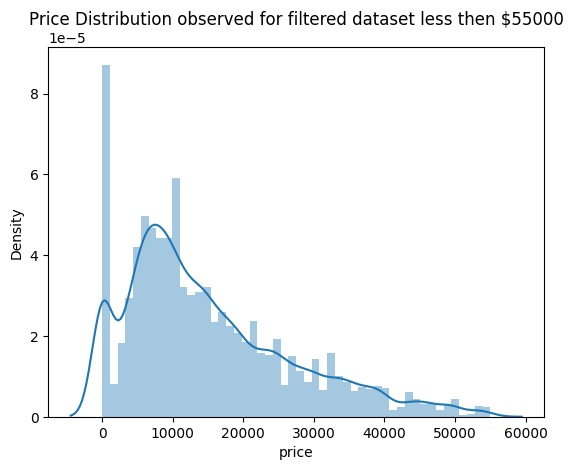

In [96]:
sns.distplot(
    vehicle_sort_min['price']
).set(title = "Price Distribution observed for filtered dataset less then $55000")

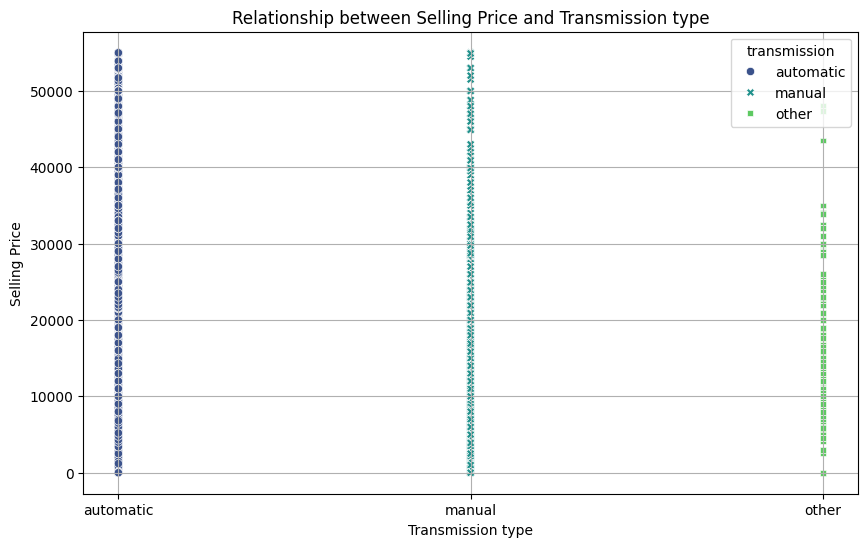

In [98]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="transmission", y="price", data=vehicle_sort_min, hue="transmission", style="transmission", palette="viridis")
plt.title("Relationship between Selling Price and Transmission type")
plt.xlabel("Transmission type")
plt.ylabel("Selling Price")
plt.legend(title="transmission")
plt.grid(True)
plt.show()

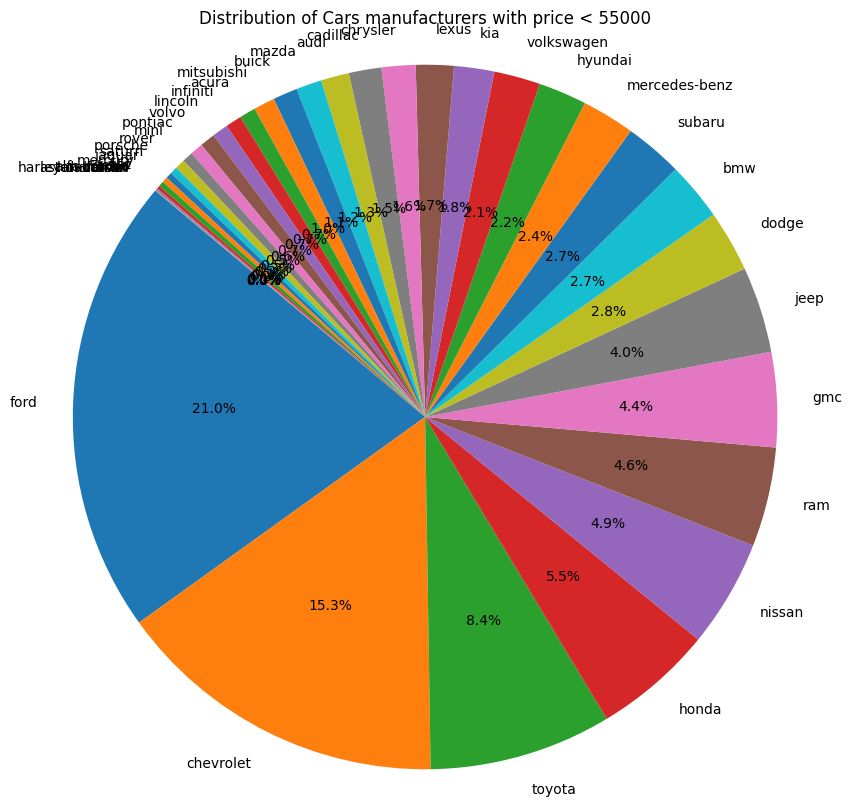

In [100]:
v_manufacturer_count = vehicle_sort_min['manufacturer'].value_counts()

# Plotting
plt.figure(figsize=(10, 10))
plt.pie(v_manufacturer_count, labels=v_manufacturer_count.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Cars manufacturers with price < 55000')
plt.show()

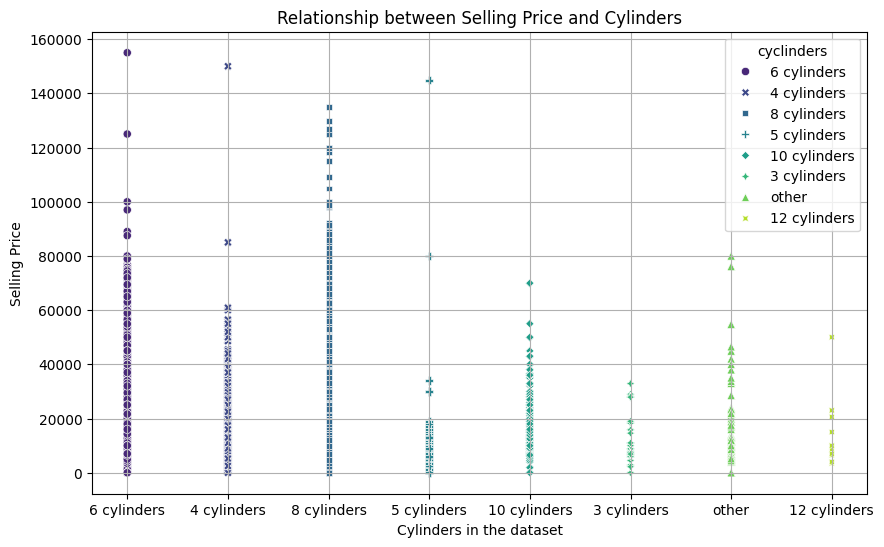

In [101]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="cylinders", y="price", data=vehicles_q, hue="cylinders", style="cylinders", palette="viridis")
plt.title("Relationship between Selling Price and Cylinders")
plt.xlabel("Cylinders in the dataset")
plt.ylabel("Selling Price")
plt.legend(title="cyclinders")
plt.grid(True)
plt.show()

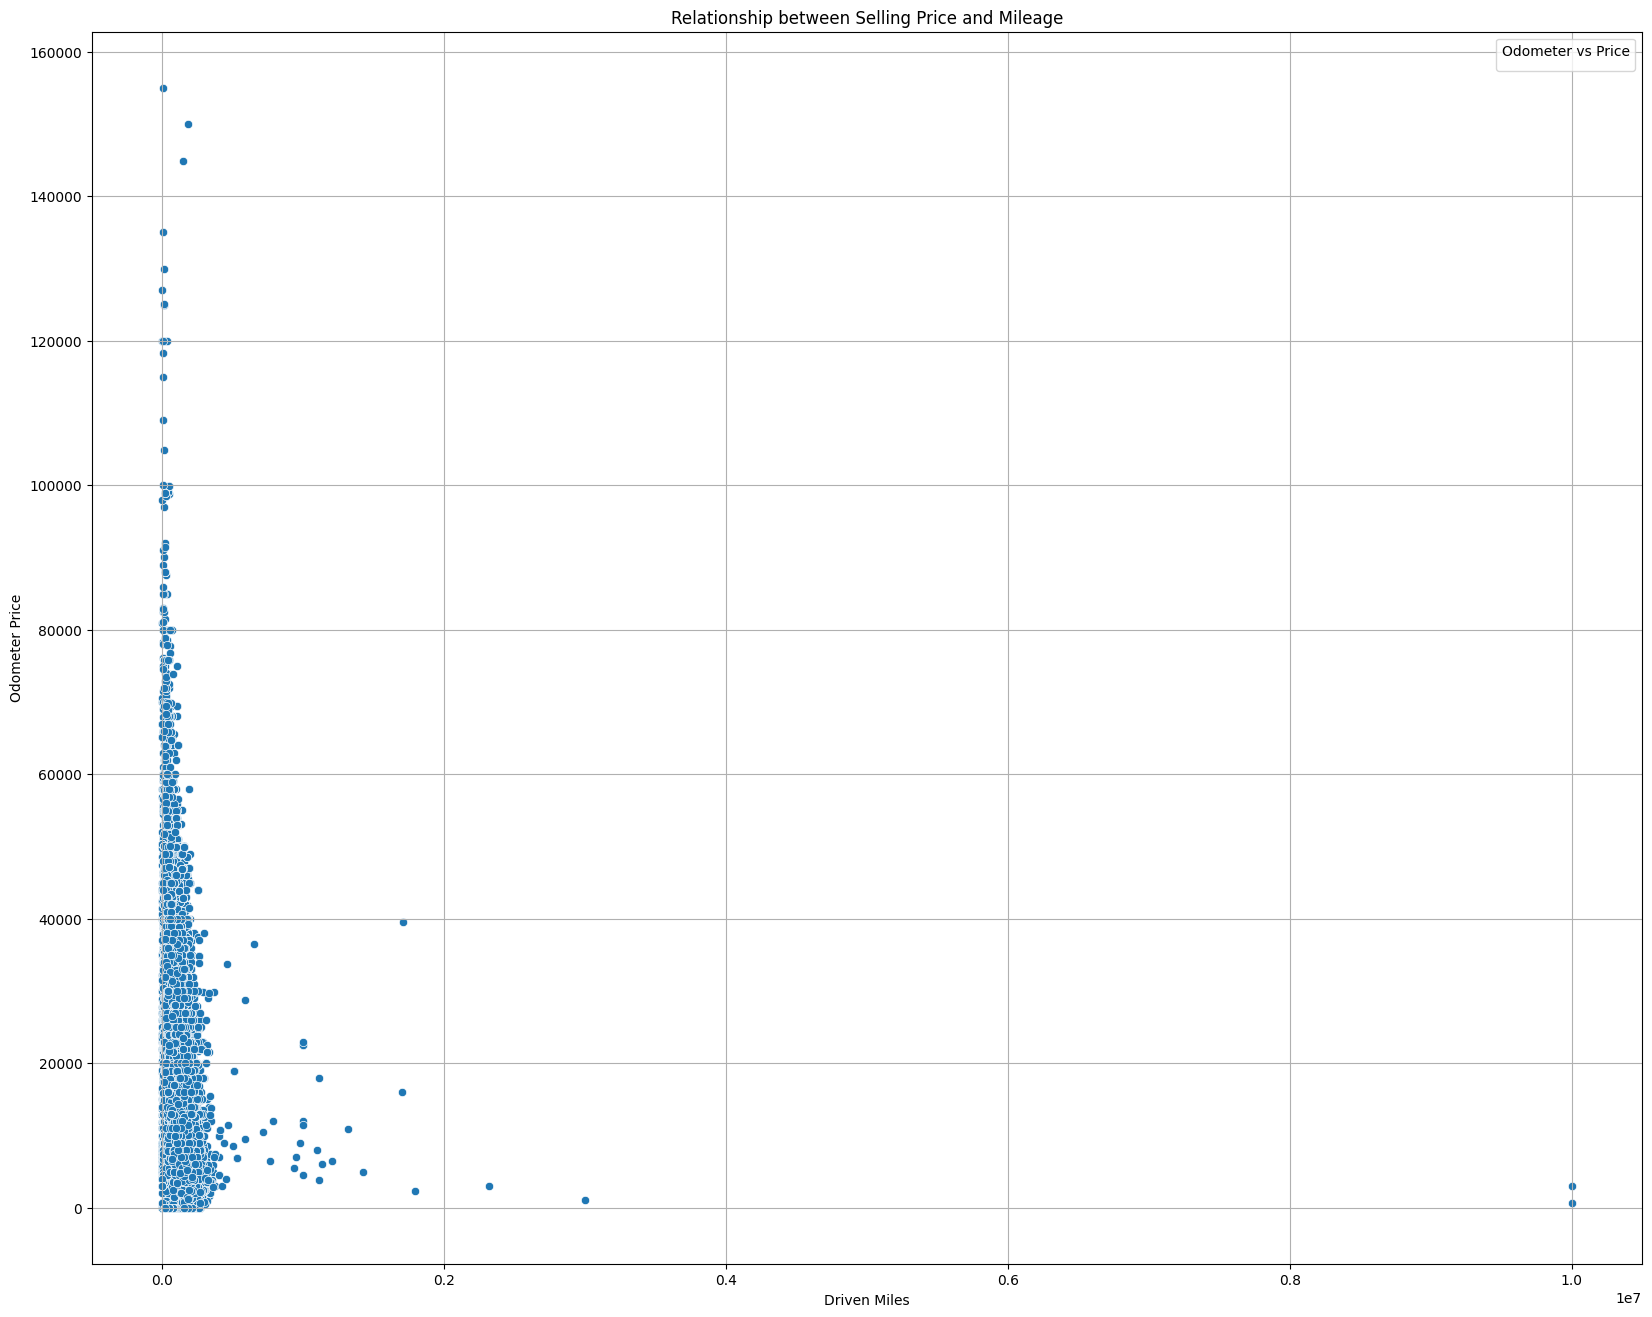

In [103]:
plt.figure(figsize=(20, 16))
sns.scatterplot( x="odometer", y="price", data=vehicles_q, palette="viridis")
plt.title("Relationship between Selling Price and Mileage")
plt.xlabel("Driven Miles")
plt.ylabel("Odometer Price")
plt.legend(title="Odometer vs Price")
plt.grid(True)
plt.show()

Most of the vehicles are < 175000 so filter the data for this range.

[Text(0.5, 1.0, 'odometer Distribution observed for filtered dataset less then 175K miles')]

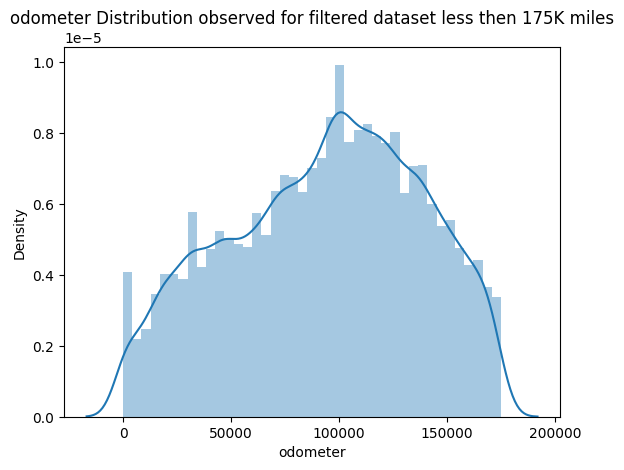

In [111]:
vehicle_odometer_less_than_175000 = vehicles_q[vehicles_q['odometer'] <= 175000]
sns.distplot(
    vehicle_odometer_less_than_175000['odometer']
).set(title = "odometer Distribution observed for filtered dataset less then 175K miles")

In [112]:
vehicle_odometer_less_than_175000.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31036 entries, 126 to 426836
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            31036 non-null  int64  
 1   region        31036 non-null  object 
 2   price         31036 non-null  int64  
 3   year          31036 non-null  float64
 4   manufacturer  31036 non-null  object 
 5   model         31036 non-null  object 
 6   condition     31036 non-null  object 
 7   cylinders     31036 non-null  object 
 8   fuel          31036 non-null  object 
 9   odometer      31036 non-null  float64
 10  title_status  31036 non-null  object 
 11  transmission  31036 non-null  object 
 12  VIN           31036 non-null  object 
 13  drive         31036 non-null  object 
 14  size          31036 non-null  object 
 15  type          31036 non-null  object 
 16  paint_color   31036 non-null  object 
 17  state         31036 non-null  object 
dtypes: float64(2), int64(2), obj

In [113]:
vehicle_sort_min = vehicle_odometer_less_than_175000

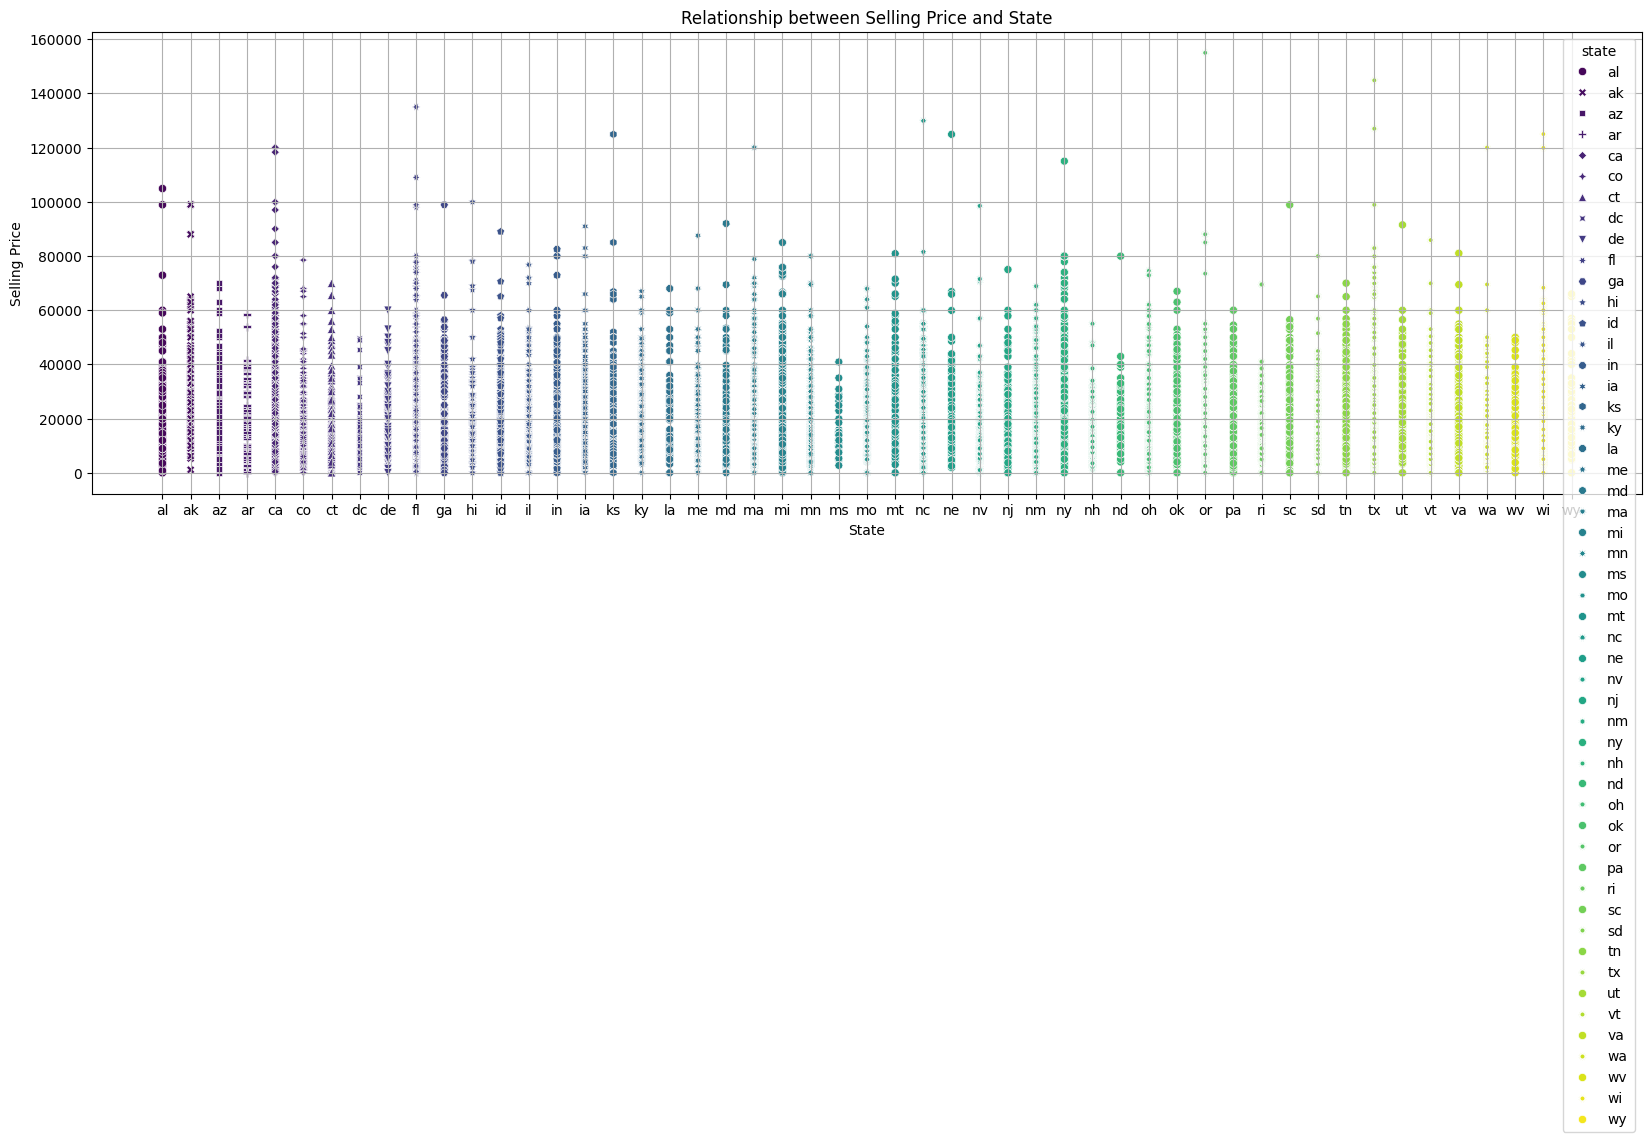

In [114]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x="state", y="price", data=vehicle_sort_min, hue="state", style="state", palette="viridis")
plt.title("Relationship between Selling Price and State")
plt.xlabel("State")
plt.ylabel("Selling Price")
plt.legend(title="state")
plt.grid(True)
plt.show()

Observation: There is no correlation observed of the price with the state. There is very limited correlation so this column could be dropped for modeling.

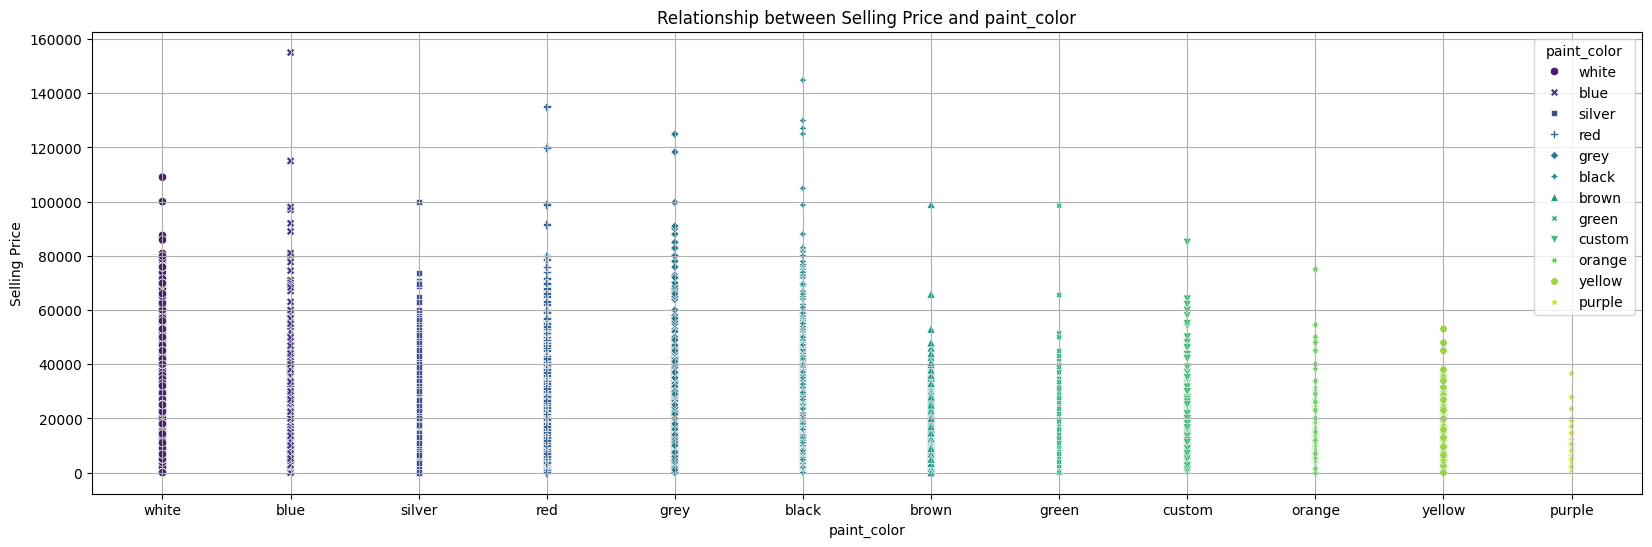

In [115]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x="paint_color", y="price", data=vehicle_sort_min, hue="paint_color", style="paint_color", palette="viridis")
plt.title("Relationship between Selling Price and paint_color")
plt.xlabel("paint_color")
plt.ylabel("Selling Price")
plt.legend(title="paint_color")
plt.grid(True)
plt.show()

Observation: There is a good correlation of price with color. Popular color is White, blue, silver, red, grey, black compared with the rest.

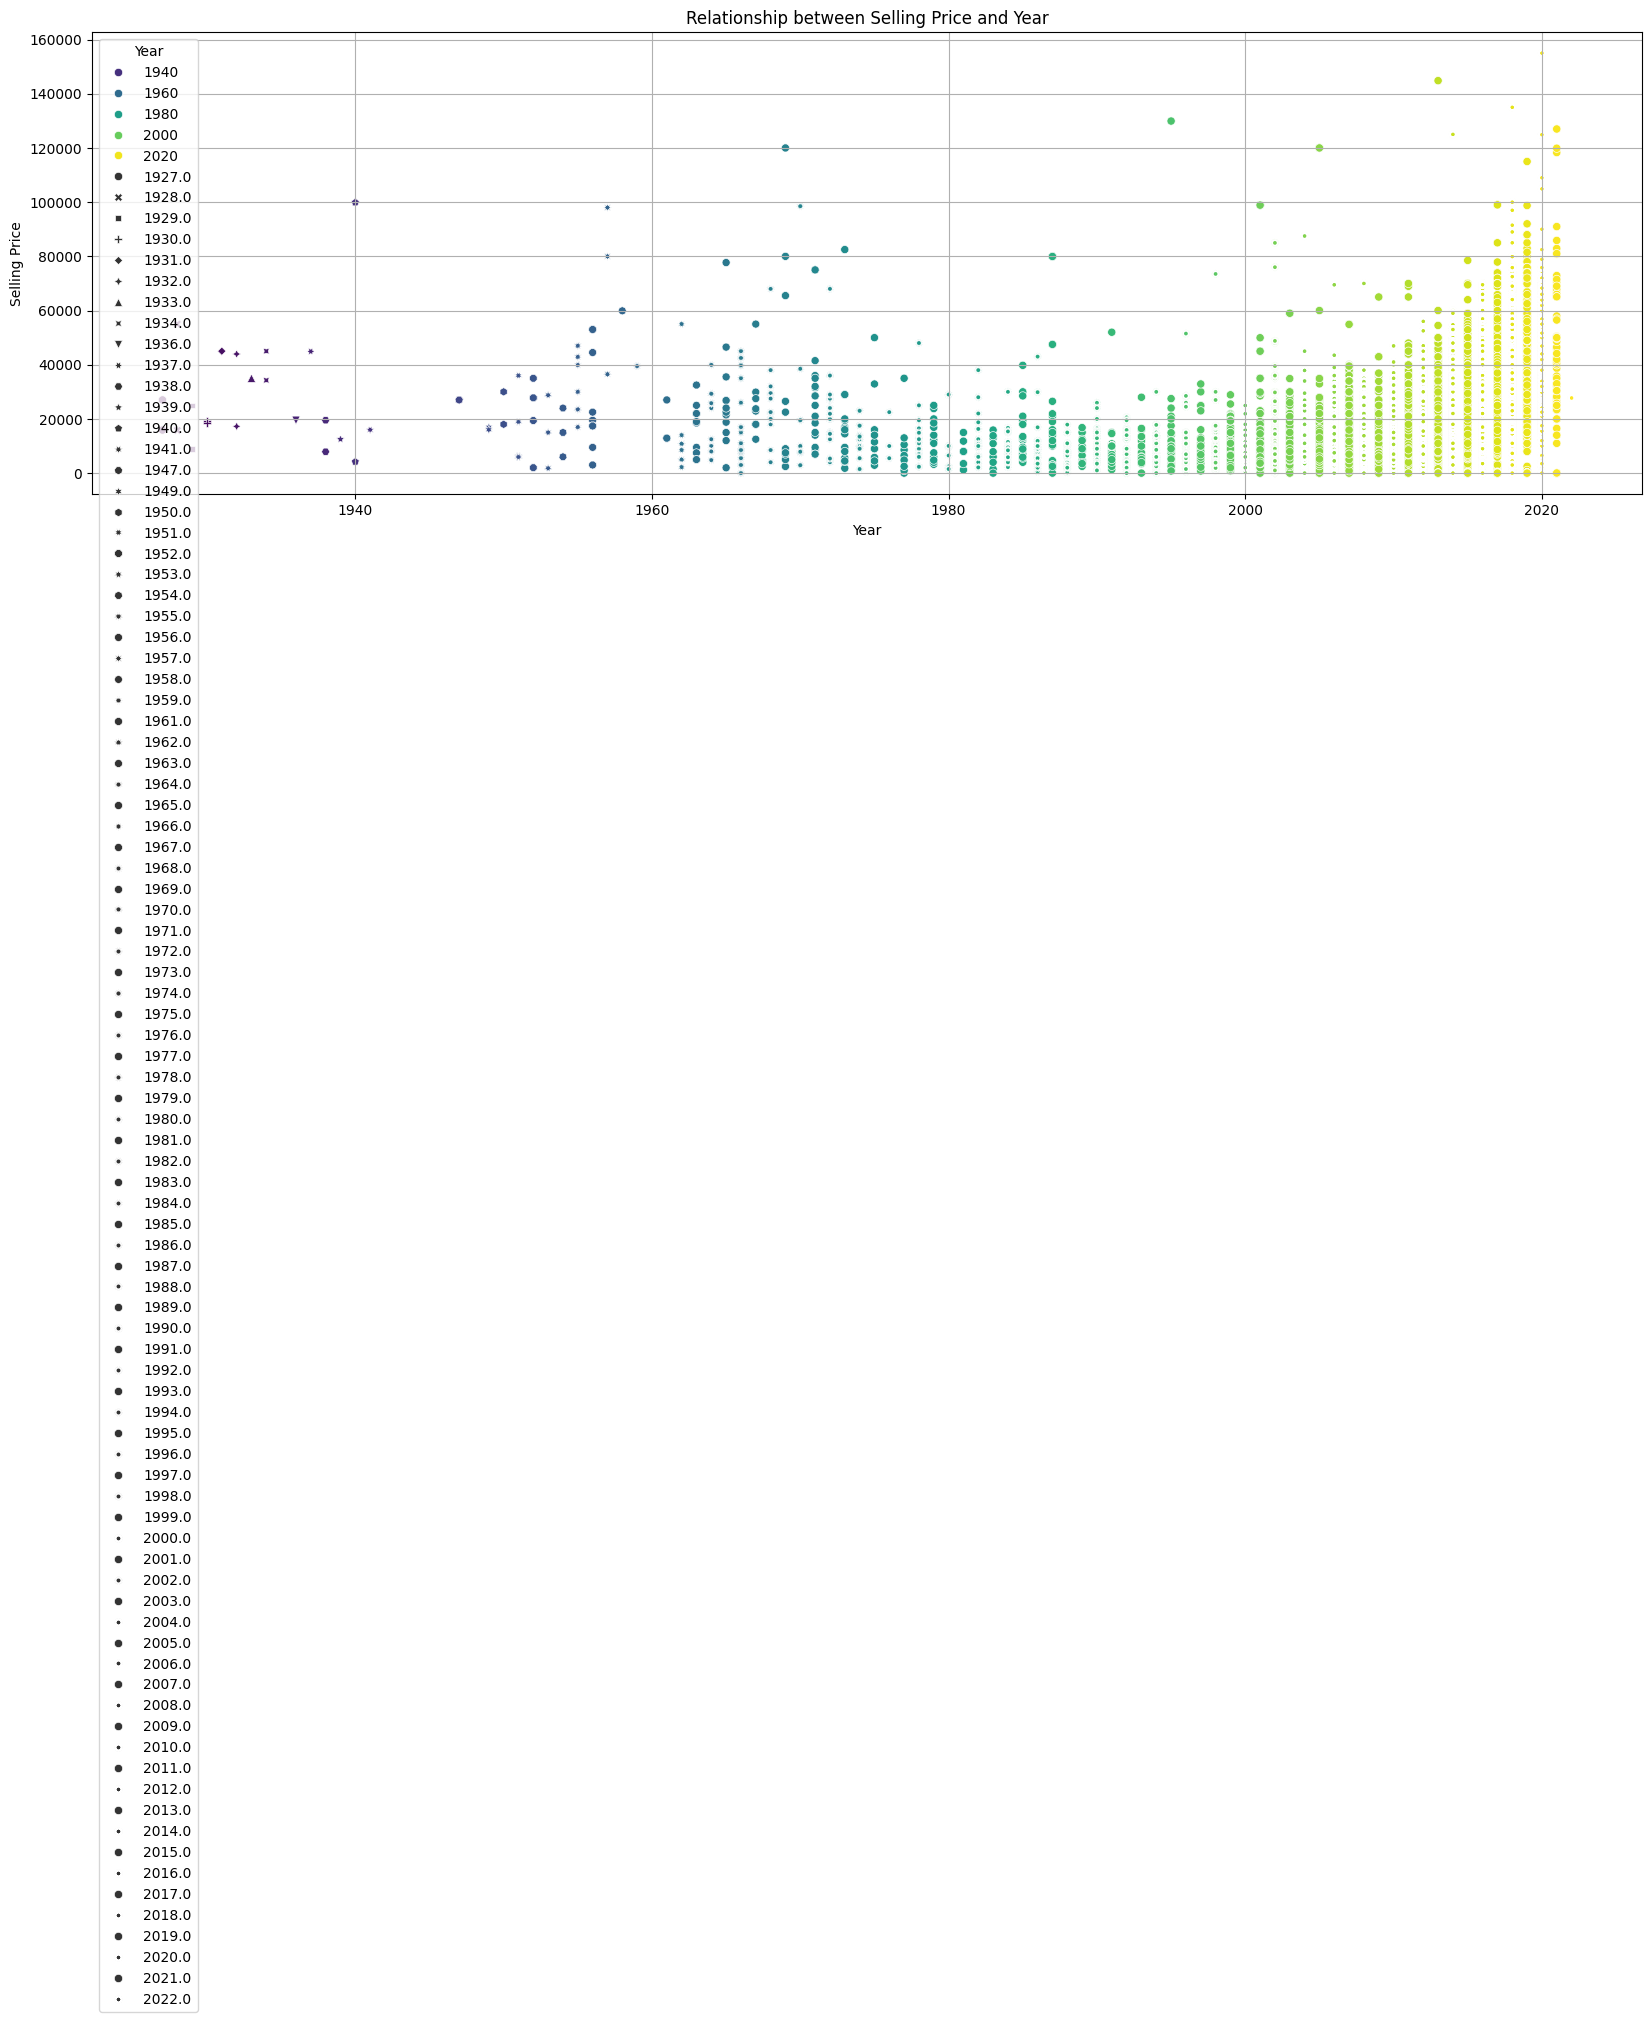

In [116]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x="year", y="price", data=vehicle_sort_min, hue="year", style="year", palette="viridis")
plt.title("Relationship between Selling Price and Year")
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.legend(title="Year")
plt.grid(True)
plt.show()

Observation: There is a good correlation of the price with the year. The data shows a linear corelation

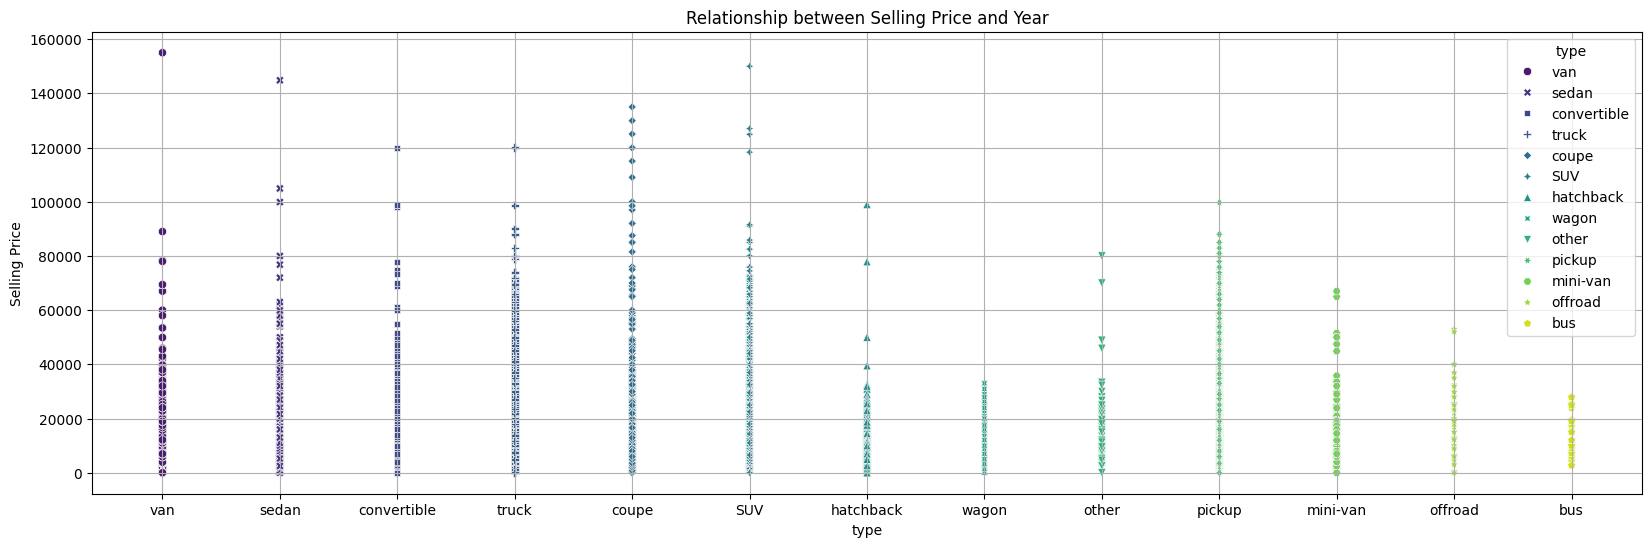

In [28]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x="type", y="price", data=vehicle_sort_min, hue="type", style="type", palette="viridis")
plt.title("Relationship between Selling Price and Year")
plt.xlabel("type")
plt.ylabel("Selling Price")
#plt.legend(title="type")
plt.grid(True)
plt.show()

Observation: Distribution shows there are few vehicle types that are chepear compared to the others but its to be seen if this can be included in the model or not.

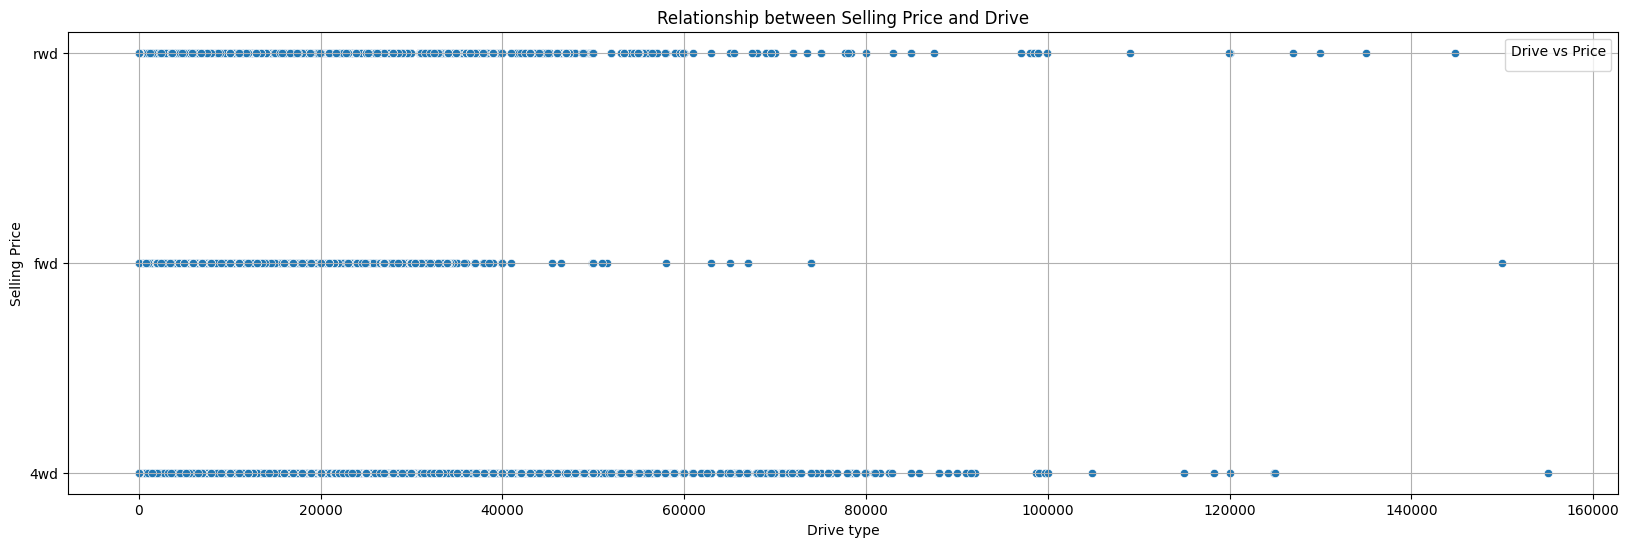

In [29]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x="price", y="drive", data=vehicle_sort_min, palette="viridis")
plt.title("Relationship between Selling Price and Drive")
plt.xlabel("Drive type")
plt.ylabel("Selling Price")
plt.legend(title="Drive vs Price")
plt.grid(True)
plt.show()

Observation: Distribution shows the fwd drive type is chepear compared to the others but its to be seen if this can be included in the model or not.

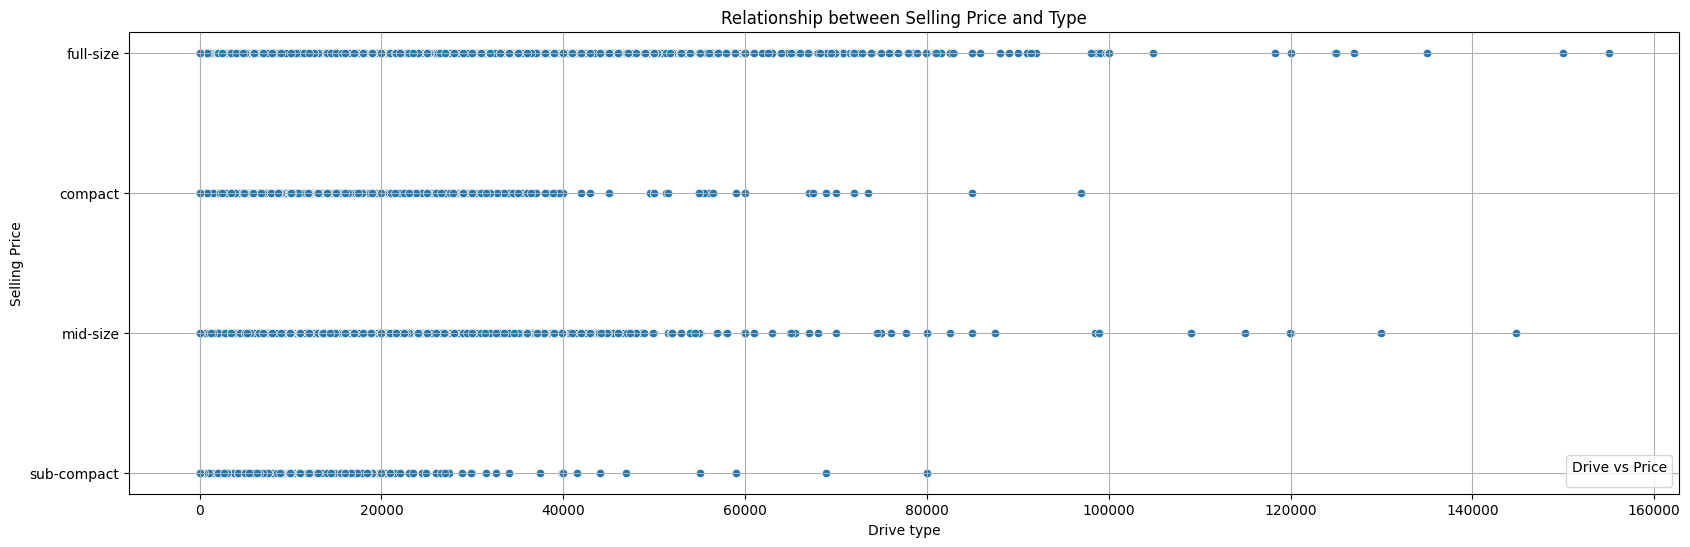

In [30]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x="price", y="size", data=vehicle_sort_min, palette="viridis")
plt.title("Relationship between Selling Price and Type")
plt.xlabel("Drive type")
plt.ylabel("Selling Price")
plt.legend(title="Drive vs Price")
plt.grid(True)
plt.show()

Observation: Distribution shows the fwd drive type is chepear compared to the others but its to be seen if this can be included in the model or not.

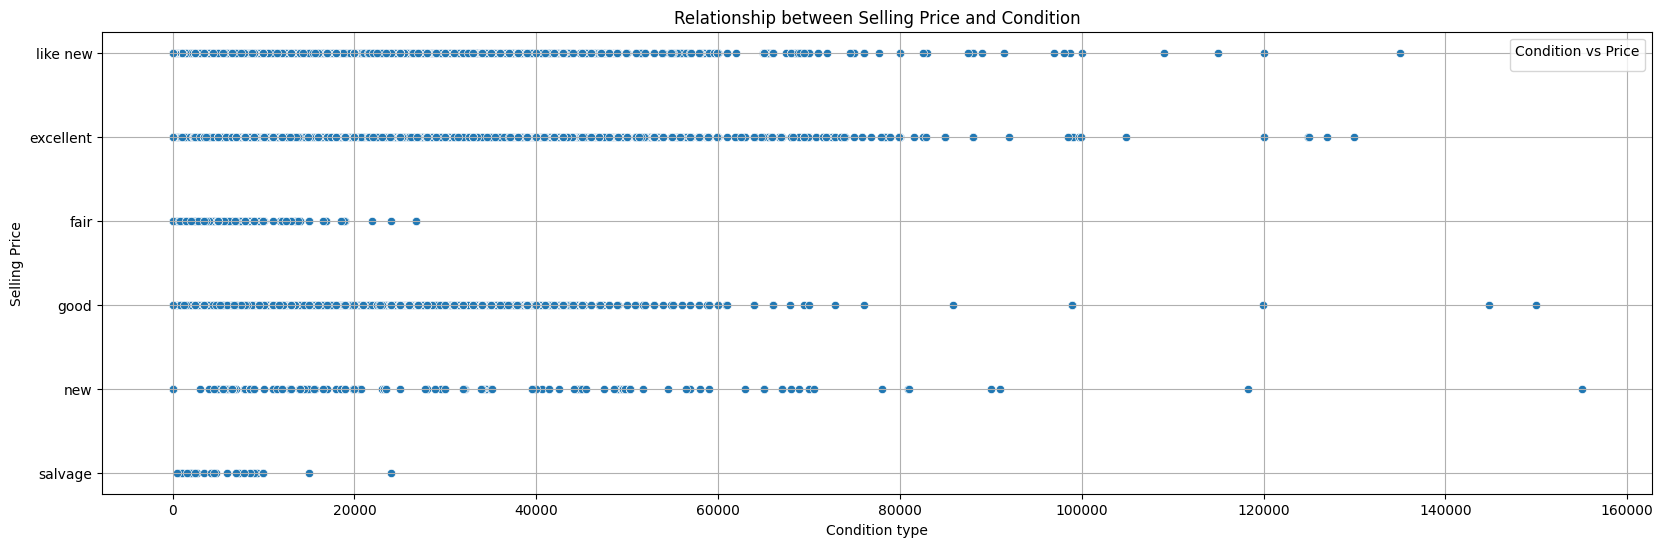

In [31]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x="price", y="condition", data=vehicle_sort_min, palette="viridis")
plt.title("Relationship between Selling Price and Condition")
plt.xlabel("Condition type")
plt.ylabel("Selling Price")
plt.legend(title="Condition vs Price")
plt.grid(True)
plt.show()

Observation: Distribution shows Salvage and fair is cheaper compared to the others but its to be seen if this can be included in the model or not as the best value needs to be choosen. Including this column could cause the model to give false positives.

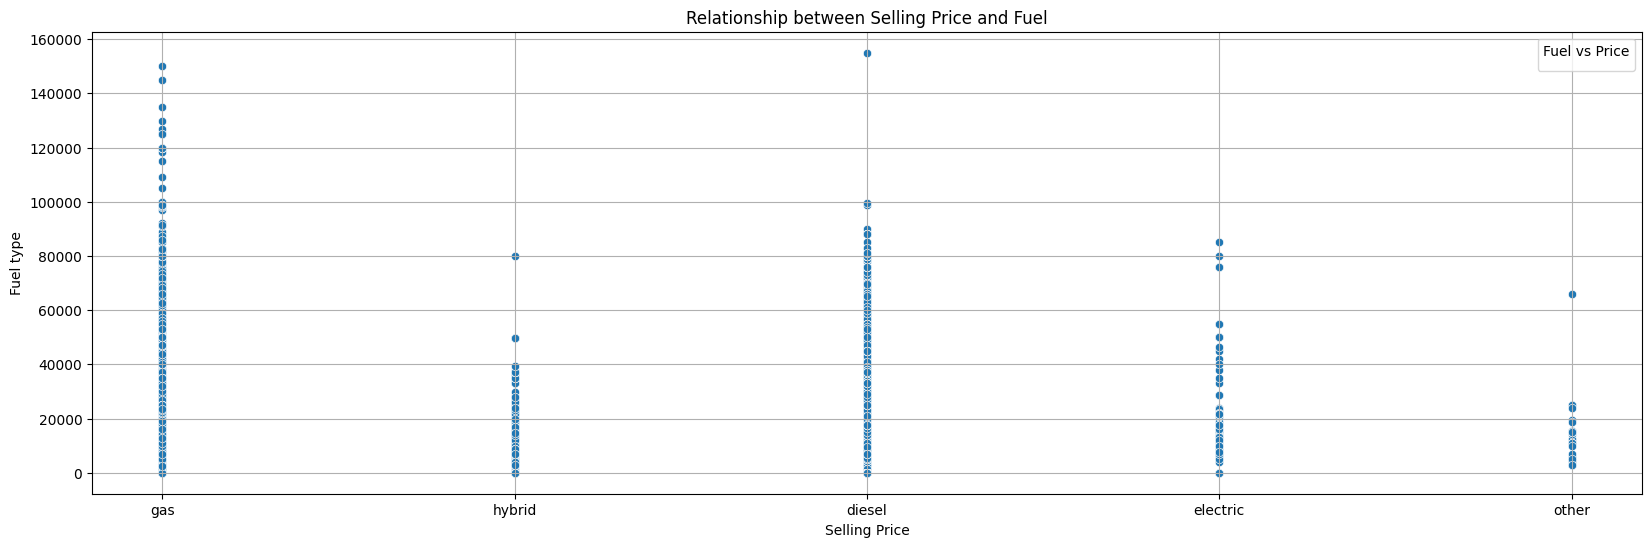

In [32]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x="fuel", y="price", data=vehicle_sort_min, palette="viridis")
plt.title("Relationship between Selling Price and Fuel")
plt.ylabel("Fuel type")
plt.xlabel("Selling Price")
plt.legend(title="Fuel vs Price")
plt.grid(True)
plt.show()


Observation: Distribution shows the gas range has a bigger range with respect to price but its to be seen if this can be included in the model or not.

Based on the given dataset, there is a high variation for Year, Odometer, paint color, cylinders, transmission, drive and fuel type.
Next step is to do the OneHotEncoding to translate the categorical objects to numerical values for the selected features.

In [122]:
encoder = OneHotEncoder(handle_unknown='ignore')
paint_encoded_array = encoder.fit_transform(vehicle_sort_min[['paint_color', 'cylinders', 'transmission', 'drive', 'fuel']])
# The transformed data is an array, so we need to convert it back to a DataFrame
print(type(paint_encoded_array))
one_hot_encoded_df = pd.DataFrame(paint_encoded_array.toarray(), columns=encoder.get_feature_names_out(['paint_color', 'cylinders', 'transmission', 'drive', 'fuel']))

# Concatenating the one-hot encoded columns to the original DataFrame
final_df = pd.concat([vehicle_sort_min, one_hot_encoded_df], axis=1).drop(['paint_color', 'id', 'region', 'title_status', 'model', 'VIN', 'condition', 'fuel','type', 'state', 'size', 'cylinders', 'transmission', 'fuel', 'drive', 'manufacturer', 'cylinders_other', 'transmission_other'], axis=1)
final_df.head()
#one_hot_encoded_df

<class 'scipy.sparse._csr.csr_matrix'>


,price,year,odometer,paint_color_black,paint_color_blue,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,...,transmission_automatic,transmission_manual,drive_4wd,drive_fwd,drive_rwd,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other
126,0.0,2018.0,68472.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
127,0.0,2019.0,69125.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
128,0.0,2018.0,66555.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
215,4000.0,2002.0,155000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
219,2500.0,1995.0,110661.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [36]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61725 entries, 126 to 31934
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   31935 non-null  float64
 1   year                    31935 non-null  float64
 2   odometer                31935 non-null  float64
 3   paint_color_black       31935 non-null  float64
 4   paint_color_blue        31935 non-null  float64
 5   paint_color_brown       31935 non-null  float64
 6   paint_color_custom      31935 non-null  float64
 7   paint_color_green       31935 non-null  float64
 8   paint_color_grey        31935 non-null  float64
 9   paint_color_orange      31935 non-null  float64
 10  paint_color_purple      31935 non-null  float64
 11  paint_color_red         31935 non-null  float64
 12  paint_color_silver      31935 non-null  float64
 13  paint_color_white       31935 non-null  float64
 14  paint_color_yellow      31935 non-null  f

In [37]:
final_df.head()

,price,year,odometer,paint_color_black,paint_color_blue,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,...,transmission_automatic,transmission_manual,drive_4wd,drive_fwd,drive_rwd,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other
126,0.0,2018.0,68472.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
127,0.0,2019.0,69125.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
128,0.0,2018.0,66555.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
215,4000.0,2002.0,155000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
219,2500.0,1995.0,110661.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [38]:
final_df.dropna(axis=0)

,price,year,odometer,paint_color_black,paint_color_blue,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,...,transmission_automatic,transmission_manual,drive_4wd,drive_fwd,drive_rwd,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other
126,0.0,2018.0,68472.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
127,0.0,2019.0,69125.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
128,0.0,2018.0,66555.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
215,4000.0,2002.0,155000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
219,2500.0,1995.0,110661.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31604,0.0,2020.0,9708.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
31616,8900.0,2016.0,102111.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
31640,8400.0,2010.0,165420.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
31732,4750.0,2008.0,123085.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [39]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61725 entries, 126 to 31934
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   31935 non-null  float64
 1   year                    31935 non-null  float64
 2   odometer                31935 non-null  float64
 3   paint_color_black       31935 non-null  float64
 4   paint_color_blue        31935 non-null  float64
 5   paint_color_brown       31935 non-null  float64
 6   paint_color_custom      31935 non-null  float64
 7   paint_color_green       31935 non-null  float64
 8   paint_color_grey        31935 non-null  float64
 9   paint_color_orange      31935 non-null  float64
 10  paint_color_purple      31935 non-null  float64
 11  paint_color_red         31935 non-null  float64
 12  paint_color_silver      31935 non-null  float64
 13  paint_color_white       31935 non-null  float64
 14  paint_color_yellow      31935 non-null  f

Observation: Drop NaN values to do the modeling

In [40]:
count = final_df.isnull().sum().sum()
print('Number of NaN values present:' +str(count))
value = final_df.isnull().values.any()
print('Number of NaN values present:' +str(value))

Number of NaN values present:953280
Number of NaN values present:True


In [41]:
final_df = final_df.dropna()

In [42]:
count = final_df.isnull().sum().sum()
print('Number of NaN values present:' +str(count))
value = final_df.isnull().values.any()
print('Number of NaN values present:' +str(value))

Number of NaN values present:0
Number of NaN values present:False


In [43]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2145 entries, 126 to 31829
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   2145 non-null   float64
 1   year                    2145 non-null   float64
 2   odometer                2145 non-null   float64
 3   paint_color_black       2145 non-null   float64
 4   paint_color_blue        2145 non-null   float64
 5   paint_color_brown       2145 non-null   float64
 6   paint_color_custom      2145 non-null   float64
 7   paint_color_green       2145 non-null   float64
 8   paint_color_grey        2145 non-null   float64
 9   paint_color_orange      2145 non-null   float64
 10  paint_color_purple      2145 non-null   float64
 11  paint_color_red         2145 non-null   float64
 12  paint_color_silver      2145 non-null   float64
 13  paint_color_white       2145 non-null   float64
 14  paint_color_yellow      2145 non-null   fl

Observation: Some of the columns have a price of 0 so remove it from the dataset.

In [44]:
final_df = final_df[final_df['price'] > 0]

Modeling

- Build Training and Test dataset

In [45]:

Y = final_df['price']
columns = ['price']
final_df.drop(columns, inplace=True, axis=1)

X = final_df

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
   X, Y, random_state=104,test_size=0.25, shuffle=False)

In [47]:
X_train.info
X_train.head(100)

,year,odometer,paint_color_black,paint_color_blue,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,...,transmission_automatic,transmission_manual,drive_4wd,drive_fwd,drive_rwd,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other
215,2002.0,155000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
219,1995.0,110661.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
268,2008.0,56700.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
337,2011.0,164000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
338,1972.0,88100.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157,2013.0,119895.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1178,2011.0,93333.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1197,2010.0,132815.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1200,2011.0,164000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


- Perform Linear Regression with Lasso regression

In [48]:
selector_pipe_linear_reg = Pipeline([
                         ('scaler', StandardScaler()),
                         ('selector', SequentialFeatureSelector(Lasso(), n_features_to_select=7))
                        ])
selector_pipe_linear_reg

Pipeline(steps=[('scaler', StandardScaler()),
                ('selector',
                 SequentialFeatureSelector(estimator=Lasso(),
                                           n_features_to_select=7))])

In [51]:
train_mses = []
test_mses = []
r2_train = []
r2_test = []


for i in range(1, 4):
    #create pipeline with PolynomialFeatures degree i
    pipe = Pipeline([
                    ('scaler', StandardScaler()),
                     ('pfeat', PolynomialFeatures(degree = i, include_bias=False)),
                     ('selector', SequentialFeatureSelector(Lasso(), n_features_to_select=6)),
                     ('linreg', LinearRegression())
                      ])

    #Feature scaling
    pipe = pipe.fit(X_train, y_train)
    
    #fit on train
    p1 = pipe.predict(X_train)
    p2 = pipe.predict(X_test)
    #predict on train and test
    train_mses.append(mean_squared_error(y_train, p1))
    test_mses.append(mean_squared_error(y_test, p2))
    r2_train.append(r2_score(y_train, p1))
    r2_test.append(r2_score(y_test, p2))
### END SOLUTION

best_model_complexity_train = train_mses.index(min(train_mses)) + 1
best_model_complexity_test = test_mses.index(min(test_mses)) + 1

# Answer check
print(train_mses)
print(test_mses)
print(r2_train)
print(r2_test)
print(best_model_complexity_train)
print(best_model_complexity_test)
pipe

[140923584.41346166, 133743705.98325409, 133761139.65249492]
[144316079.69749203, 136268594.6201442, 135838989.30273965]
[0.246316912763203, 0.2847161130374958, 0.2846228748353171]
[0.16858715577288097, 0.2149491583373766, 0.2174241381150086]
2
3


Pipeline(steps=[('scaler', StandardScaler()),
                ('pfeat', PolynomialFeatures(degree=3, include_bias=False)),
                ('selector',
                 SequentialFeatureSelector(estimator=Lasso(),
                                           n_features_to_select=6)),
                ('linreg', LinearRegression())])

In [52]:
print(f"model score on training data: {pipe.score(X_train, y_train)}")
print(f"model score on testing data: {pipe.score(X_test, y_test)}")

model score on training data: 0.2846228748353171
model score on testing data: 0.2174241381150086


Observation: Used a pipeline with StandardScaler and PolynomialFeatures to iterate upto the 4th order polynomial, using a Lasso regression estimator.
- The r2 value shows the best complexitity for the training had a value of 0.28 and the r2 for the test had a best value of 0.21
- This is not optimal since the model close to a value of 1 will give the good result.

Additional results when modifying the feature set
- When using the manufacturing data set along with the above shown columns, the results had a best model of 0.5 and above however, the r2 score for the test showed a -ve value.
- This indicates there is overfitting and hence did not include this column.

Potential next steps:
- Based on the distributing of the manufacturers try to select some manufacturers instead of all

In [54]:
selector_pipe = Pipeline([
                         ('scaler', StandardScaler()),
                         ('polyfeatures', PolynomialFeatures(degree = 3, include_bias = False)),
                         ('selector', SequentialFeatureSelector(Lasso(), n_features_to_select=5)),
                         ('lasso', Lasso(alpha=1.0))
                        ])
selector_pipe

Pipeline(steps=[('scaler', StandardScaler()),
                ('polyfeatures',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('selector',
                 SequentialFeatureSelector(estimator=Lasso(),
                                           n_features_to_select=5)),
                ('lasso', Lasso())])

In [57]:
selector_pipe.fit(X_train, y_train)

selector_train_preds = selector_pipe.predict(X_train)
selector_test_preds = selector_pipe.predict(X_test)
selector_train_mse = mean_squared_error(y_train, selector_train_preds)
selector_test_mse = mean_squared_error(y_test, selector_test_preds)
### END SOLUTION

# ANSWER CHECK
print(f'Train MSE: {selector_train_mse}')
print(f'Test MSE: {selector_test_mse}')
r2_score(y_train, selector_train_preds)
r2_score(y_test, selector_test_preds)
print(f"model score on training data: {selector_pipe.score(X_train, y_train)}")
print(f"model score on testing data: {selector_pipe.score(X_test, y_test)}")

Train MSE: 136458925.84335646
Test MSE: 135229756.20045182
model score on training data: 0.27019465947664567
model score on testing data: 0.2209339634056634


Observation: Results were similar when selecting different alpha values

In [71]:
### BEGIN SOLUTION
ridge_param_dict = {'ridge__alpha': np.logspace(0, 10, 50)}
ridge_pipe = Pipeline([('scaler', StandardScaler()), 
                      ('ridge', Ridge(alpha=1e-2))])
ridge_grid = GridSearchCV(ridge_pipe, param_grid=ridge_param_dict)
ridge_grid.fit(X_train, y_train)
ridge_train_preds = ridge_grid.predict(X_train)
ridge_test_preds = ridge_grid.predict(X_test)
ridge_train_mse = mean_squared_error(y_train, ridge_train_preds)
ridge_test_mse = mean_squared_error(y_test, ridge_test_preds)
### END SOLUTION

# ANSWER CHECK
print(f'Train MSE: {ridge_train_mse}')
print(f'Test MSE: {ridge_test_mse}')
ridge_pipe

Train MSE: 140058160.07581285
Test MSE: 144211259.18738753


Pipeline(steps=[('scaler', StandardScaler()), ('ridge', Ridge(alpha=0.01))])

In [64]:
print(f"model score on training data: {ridge_grid.score(X_train, y_train)}")
print(f"model score on testing data: {ridge_grid.score(X_test, y_test)}")

model score on training data: 0.2509453480196845
model score on testing data: 0.16919103247617018


In [75]:
model_1 = Ridge().fit(X_train, y_train)
model_1_coefs = list(model_1.coef_)
### END SOLUTION
feature_names = list(final_df.columns)
print(feature_names)
# Answer check
print(f'Ridge Coefs: {(np.round(model_1_coefs, 2))}')
ridge_df = pd.DataFrame({'feature': feature_names, 'coef': model_1_coefs})
print(type(ridge_df))
ridge_df.head(60)
ridge_df.loc[ridge_df['coef'] != 0]

['year', 'odometer', 'paint_color_black', 'paint_color_blue', 'paint_color_brown', 'paint_color_custom', 'paint_color_green', 'paint_color_grey', 'paint_color_orange', 'paint_color_purple', 'paint_color_red', 'paint_color_silver', 'paint_color_white', 'paint_color_yellow', 'cylinders_10 cylinders', 'cylinders_12 cylinders', 'cylinders_3 cylinders', 'cylinders_4 cylinders', 'cylinders_5 cylinders', 'cylinders_6 cylinders', 'cylinders_8 cylinders', 'transmission_automatic', 'transmission_manual', 'drive_4wd', 'drive_fwd', 'drive_rwd', 'fuel_diesel', 'fuel_electric', 'fuel_gas', 'fuel_hybrid', 'fuel_other']
Ridge Coefs: [ 3.560700e+02 -1.100000e-01 -3.376300e+02 -6.154200e+02 -9.191800e+02
  4.390200e+02 -1.433600e+03 -2.215990e+03  1.212557e+04  7.843300e+02
 -1.323770e+03 -1.224500e+03 -2.704220e+03 -2.574620e+03  2.255400e+02
 -1.328700e+02 -2.235310e+03  3.745500e+02  4.666830e+03  2.019400e+02
 -1.049150e+03 -5.222670e+03 -5.375110e+03 -1.234400e+02 -7.687000e+02
  8.921500e+02 -2.19

,feature,coef
0,year,356.072036
1,odometer,-0.110553
2,paint_color_black,-337.626642
3,paint_color_blue,-615.418270
4,paint_color_brown,-919.179436
5,paint_color_custom,439.020612
6,paint_color_green,-1433.595158
7,paint_color_grey,-2215.991626
8,paint_color_orange,12125.568159
9,paint_color_purple,784.328490


Observation: Used a pipeline with StandardScaler and Ridge regression.

The r2 value shows the best complexitity for the training had a value of 0.25 and the r2 for the test had a best value of 0.16
This is not optimal since the model close to a value of 1 will give the good result.
Additional results when modifying the feature set

Potential next steps:

Based on the distributing of the manufacturers try to select some manufacturers instead of all.

In [66]:
def plot_feature_importances(perm_importance_result, feat_name):
    """bar plot the feature importance"""

    fig, ax = plt.subplots(figsize=(10,20))
    #plt.figure(figsize=(20, 16))

    indices = perm_importance_result["importances_mean"].argsort()
    plt.barh(
        range(len(indices)),
        perm_importance_result["importances_mean"][indices],
        xerr=perm_importance_result["importances_std"][indices],
    )

    ax.set_title("Parameter importance for Car features")
    ax.set_xlabel('Weightage')
    ax.set_ylabel('Features')
    ax.set_yticks(range(len(indices)))
    _ = ax.set_yticklabels(feat_name[indices])

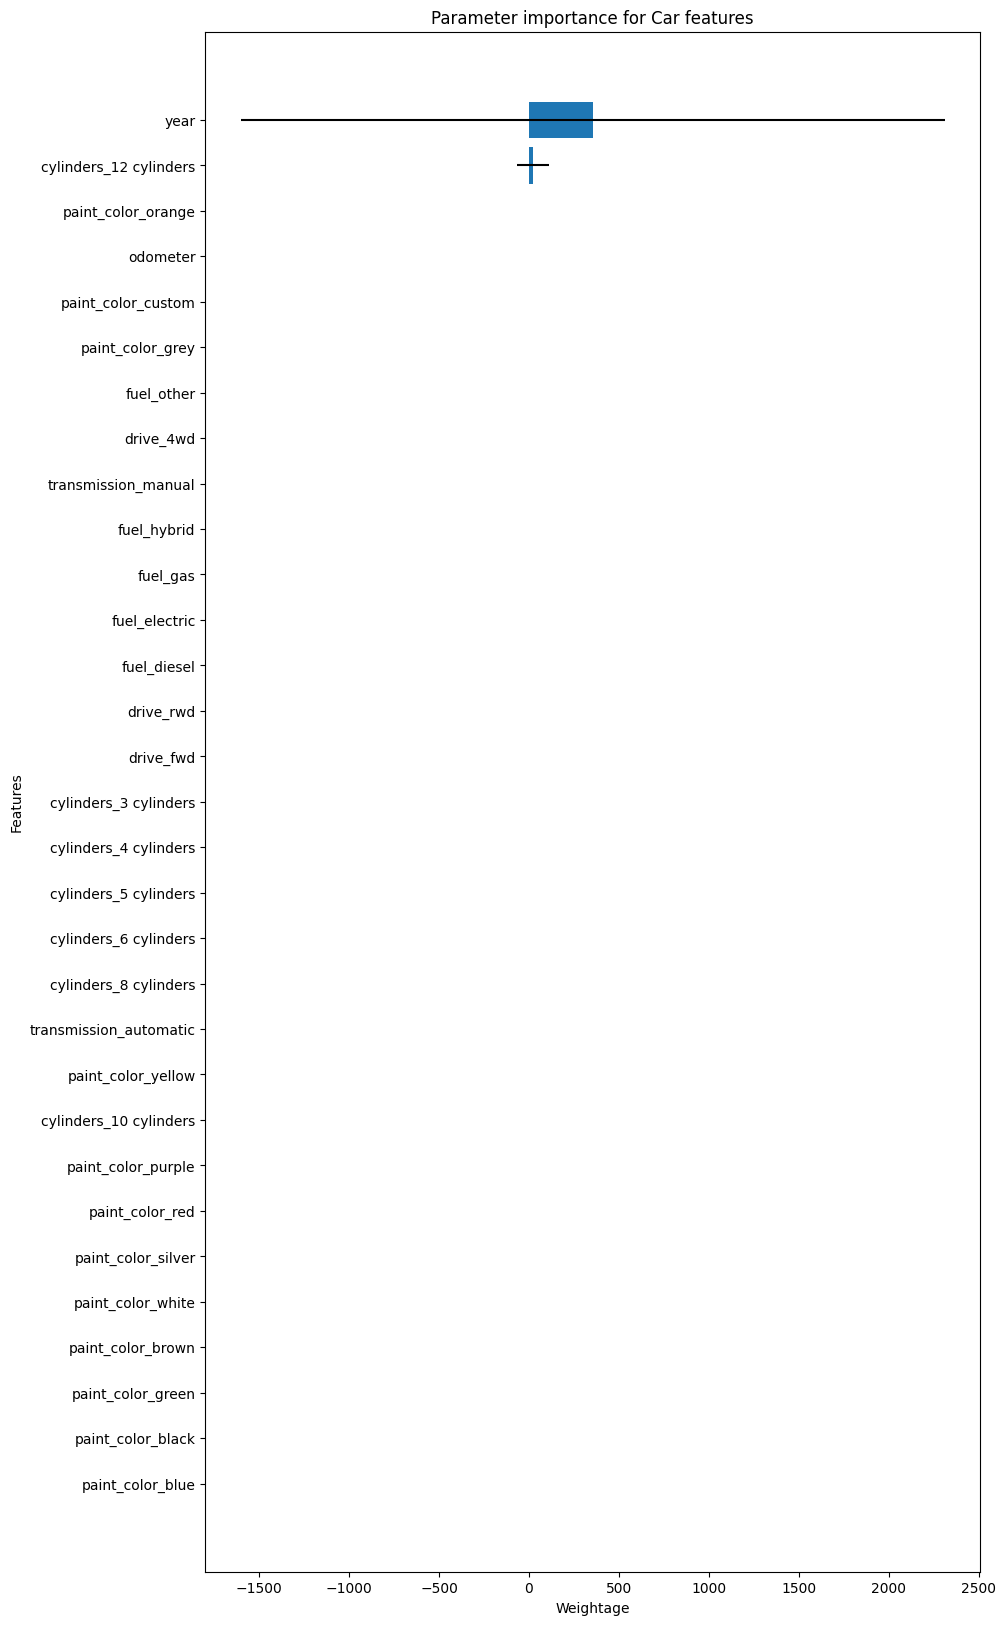

In [67]:
perm_importance_result_train = permutation_importance(
    pipe, X_train, y_train, n_repeats=32
)

plot_feature_importances(perm_importance_result_train, X_test.columns)

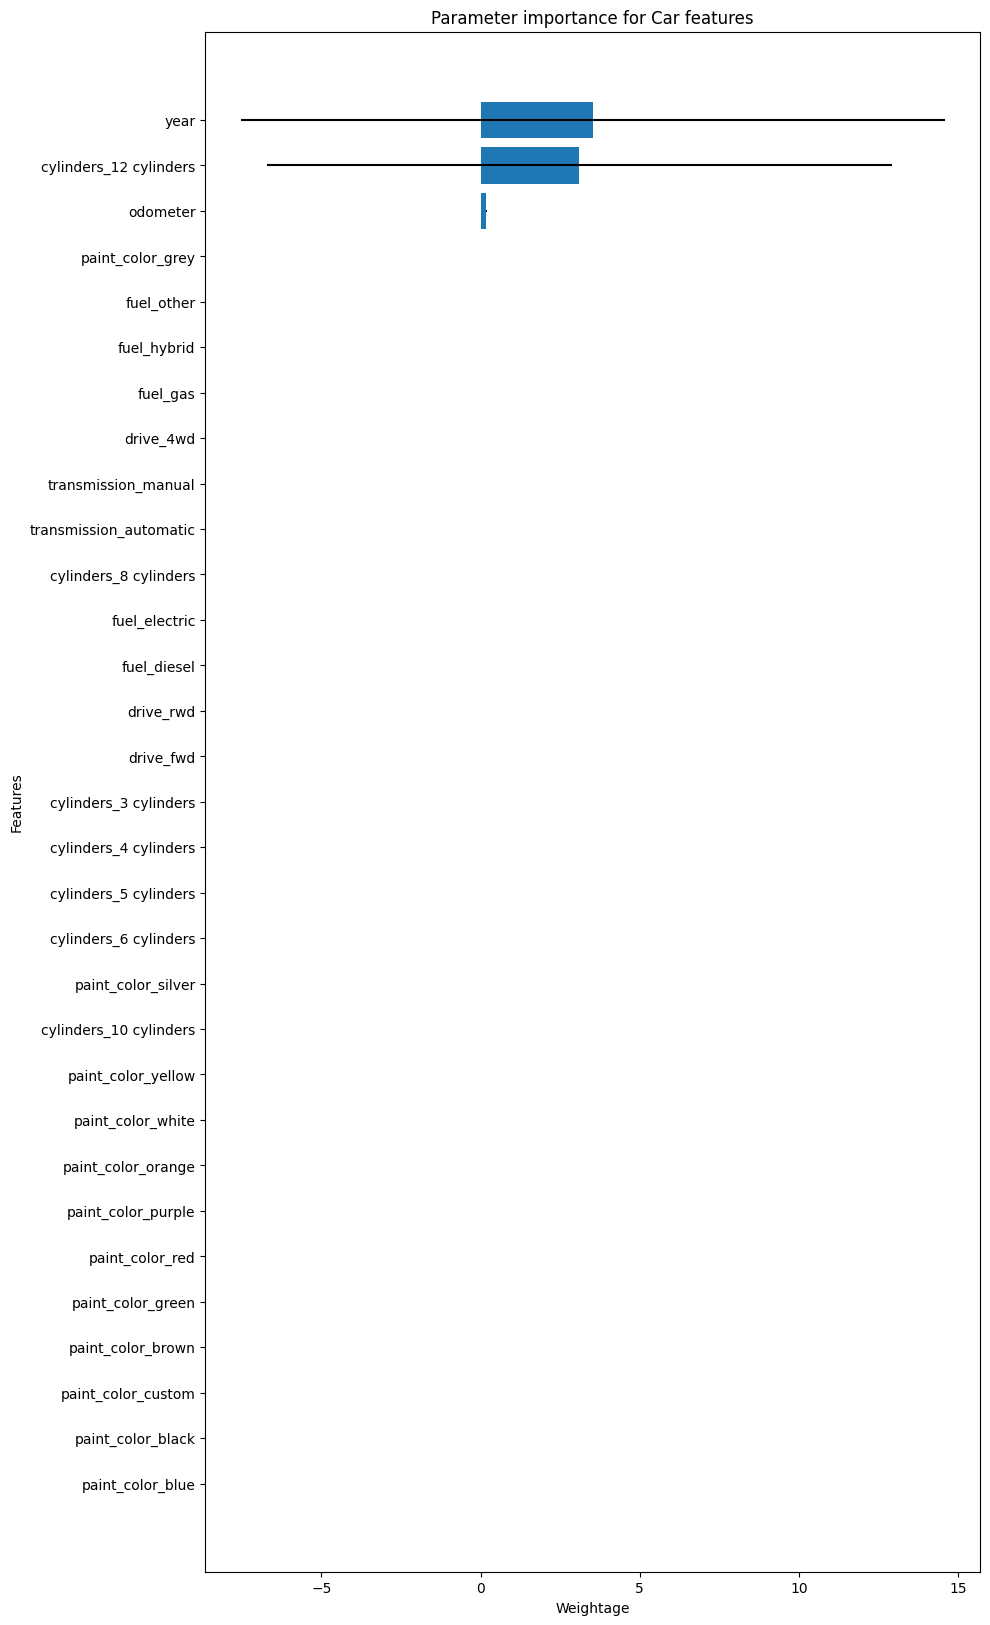

In [68]:
perm_importance_result_train = permutation_importance(
    selector_pipe, X_train, y_train, n_repeats=32
)

plot_feature_importances(perm_importance_result_train, X_test.columns)

Observation: The feature importance shown for the given models shows the year to be the most important factor in determining the value of the price.

In this model, a surprising result is that a 12 cylinder car was considered a good feature. This sounds counterintutive.
The data does not include the miles/gallon in the price calculation and this could impact the model.
